<a href="https://colab.research.google.com/github/daseul0719/NLP_2024/blob/main/13_Sentiment_HarryPotter_PolSubj_HarryPotter_Aesop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🐹 🐾 🐟 This script is based on [**Prof. Hosung Nam's github (hsnam95)**](https://github.com/hsnam95) and [**Prof. Junkyu Lee's github (junkyuhufs)**](https://github.com/junkyuhufs)

In [ ]:
#@markdown ##🐹 🐾  <font color = 'red'> **[1] 복제하여 Harry Potter자료 가져오기**
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106 (from 1)
Receiving objects: 100% (109/109), 13.39 MiB | 17.09 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
#@markdown ##🐹 🐾  <font color = 'blue'> **[2] 데이터 전처리: Pandas이용 데이터 정리 (책의 한 챕터가 한 셀에 있는 상태)**
import pandas as pd #Importing Pandas package
%cd /content/Harry-Potter-Text-Mining/Book Text

import glob
fns = glob.glob('*.txt')
df = pd.DataFrame()  #엑셀화 시킴
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")  #txt->csv로
  df = pd.concat([df, dftmp])

%cd /content

df

#"": 인용 시 사용

/content/Harry-Potter-Text-Mining/Book Text
/content


,Text,Chapter,Book
0,The villagers of Little Hangleron still call...,1,4
1,"Harry lay flat on his back, breathing hard a...",2,4
2,"By the time Harry arrived in the kitchen, th...",3,4
3,"By twelve o'clock the next day, Harry's scho...",4,4
4,"Harry spun faster and faster, elbows tucked ...",5,4
...,...,...,...
12,NICOLAS FLAMEL Dumbledore had convinced Harry...,13,1
13,"NORBERT THE NORWEGIAN RIDGEBACK Quirrell, how...",14,1
14,THE FORIBIDDEN FOREST Things couldn't have be...,15,1
15,"THROUGH THE TRAPDOOR In years to come, Harry ...",16,1


In [ ]:
#결과
#총 200행(0부터 199), 3열

In [ ]:
#@markdown ##🐹 🐾  **[3] 데이터 전처리 불용어(stopwords) 제거**
!pip install nltk
import nltk #Import NLTK library

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')  #대체하라는 뜻
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords]
#Remove punctuation from stopwords

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize)
# Word Count Text
# Word Count         #맨 위 헤더에 Text

df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords])
# Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
!pip install nltk
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk import word_tokenize
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

import string

def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords]

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize)
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords])
df['WordCount']=df['WordCountText'].str.len()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
#@markdown ##🐹 🐾  **[4] 데이터 전처리: 책 > 문장단위로 (챕터가 문장단위로 나뉜 상태)**
# Creating a table breaking down the text by each sentence, rather than each chapter.

from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Make smaller table - reset index to prepare for further work
dfsentiment = df[['Book','Chapter','Text']].reset_index() \
    .drop(["index"], axis=1)                 #인덱스를 리셋
dfsentiment = dfsentiment.join(dfsentiment.Text.apply(sent_tokenize).rename('Sentences'))
# Breaking apart text into sentences

#Put every tokenized sentence into its own row
#시리즈 클래스
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["Text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
#분류 작업  #
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values and last five values
dfsentiment2

,Book,Chapter,Sentence
0,1,1,the boy who lived mr and mrs dursley of numbe...
1,1,1,they were the last people youd expect to be in...
2,1,1,mr dursley was the director of a firm called g...
3,1,1,he was a big beefy man with hardly any neck al...
4,1,1,mrs dursley was thin and blonde and had nearly...
...,...,...,...
70979,7,37,the train began to more and harry walked along...
70980,7,37,harry kept smiling and waving even though it w...
70981,7,37,the train rounded a corner
70982,7,37,harrys hand was still raised in farewellhell b...


In [ ]:
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

dfsentiment = df[['Book', 'Chapter', 'Text']]

In [ ]:
#stem:

In [ ]:
#@markdown ##🐹 🐾 **[5] 필요한 라이브러리(VADER library) 불러오기**
#>
#@markdown <font color = 'blue black'> "vader" refers to the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is implemented as part of NLTK's sentiment module.

#@markdown VADER is **_valence aware_** because it takes into account the intensity of sentiment expressed in the text. It uses a pre-built lexicon (dictionary) of words, each annotated with a sentiment score indicating the positivity or negativity of the word. Additionally, it considers various grammatical and syntactical rules to interpret the sentiment expressed by the combination of words in a sentence.

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
"vader"는 NLTK의 감정 모듈의 일부로 구현된 VADER(Valence Aware Dictionary and sEntiment Reasoner) 감정 분석 도구를 말합니다.

VADER는 텍스트에서 표현된 감정의 강도를 고려하기 때문에 가치를 인식합니다.
단어의 사전 구축된 어휘집(사전)을 사용하며, 각 단어에는 단어의 긍정성 또는 부정성을 나타내는 감정 점수가 주석으로 달려 있습니다.
또한 다양한 문법적 및 구문적 규칙을 고려하여 문장에서 단어 조합으로 표현된 감정을 해석합니다.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


###Harry Potter 예시문장 (stemmed 문장)


|출처 | 예시문장 | 감정 |
|--|--|--|
|[0,1,1]|'the boy who lived mr and mrs dursley of number four privet drive were **proud** to say that they were perfectly normal **thank** you very much'|😄 Positive|[0,1,1]|
|[1,1,1]|'they were the last people youd expect to be involved in anything **strange** or **mysterious** because they just didnt hold with such **nonsense**'|😡 Negative |
|[2,1,1]|'mr dursley was the director of a firm called grunnings which made drills'|😐 Neutral|


+ *Note*. 출처 == [sentence number, Book, Chapter]

In [ ]:
#@markdown ##🐹 🐾 **[6] 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral**
# Get intensity scores of each sentence
dfsentiment2['Score']=dfsentiment2.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment2['CompScore']=dfsentiment2.Score.apply(lambda x: x.get("compound"))
dfsentiment2['PosScore']=dfsentiment2.Score.apply(lambda x: x.get("pos"))
dfsentiment2['NegScore']=dfsentiment2.Score.apply(lambda x: x.get("neg"))
dfsentiment2['NeuScore']=dfsentiment2.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment2 = dfsentiment2.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment2['PosFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment2['NegFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment2['NeuFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

In [ ]:
#@markdown ##🐹 🐾 **[7] 처음 나온 결과 20개 보기**
dfsentiment2.head(20)

,Book,Chapter,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,1,1,the boy who lived mr and mrs dursley of numbe...,0.8779,0.335,0.000,0.665,1,0,0
1,1,1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,1,1,mr dursley was the director of a firm called g...,0.0000,0.000,0.000,1.000,0,0,1
3,1,1,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,1,1,mrs dursley was thin and blonde and had nearly...,0.4927,0.084,0.000,0.916,1,0,0
5,1,1,the dursleys had a small son called dudley and...,-0.2960,0.000,0.121,0.879,0,1,0
6,1,1,the dursleys had everything they wanted but th...,0.3612,0.199,0.148,0.653,1,0,0
7,1,1,they didnt think they could bear it if anyone ...,0.0000,0.000,0.000,1.000,0,0,1
8,1,1,mrs potter was mrs dursleys sister but they ha...,0.0000,0.000,0.000,1.000,0,0,1
9,1,1,the dursleys shuddered to think what the neigh...,0.0000,0.000,0.000,1.000,0,0,1


In [ ]:
#posscore: 긍정점수
#neg: 0~-1까지
#neuscore: 높을수록 멀어짐

* Negative Flag:  18385
* Neutral Flag:  33544
* Positive Flag:  19055
Total:  70984


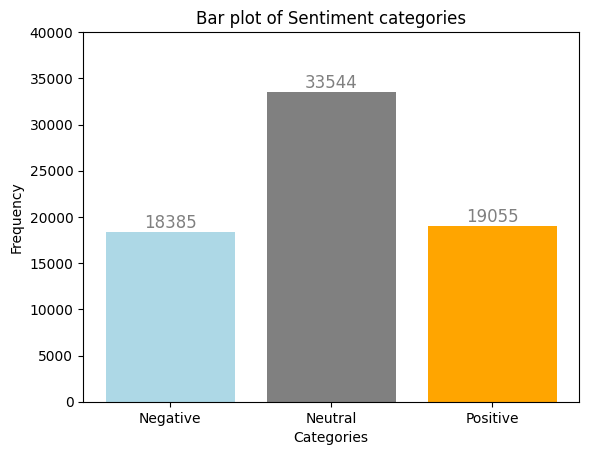

In [ ]:
#@markdown ##🐹 🐾 **[8] <font color = 'red'> 감정분석 결과 막대그래프 (부정, 중립, 긍정)**

print('* Negative Flag: ', dfsentiment2['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment2['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment2['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment2['PosFlag'].sum()+dfsentiment2['NeuFlag'].sum()+dfsentiment2['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt
#numpy:

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 40000)
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()

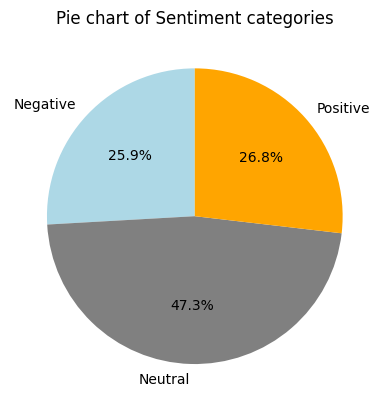

In [ ]:
#@markdown ##🐹 🐾 **[9] <font color = 'red'> 감정분석 카테고리 파이차트 (비율확인용)**
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment2['NegFlag'].sum())
Neutral = int(dfsentiment2['NeuFlag'].sum())
Positive = int(dfsentiment2['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()

##🐹🍎 **Interpretating Polarity and Subjectivity**

**Polarity 극성:** 0.131

Interpretation: The polarity score of 0.136 suggests that the text has a slightly positive sentiment, but it's not strongly positive. This means the emotions expressed in the text lean toward the positive side, but the overall tone is fairly neutral with just a mild positive inclination. Range Context: Polarity scores close to 1 would indicate very positive sentiment. Scores close to -1 would indicate strong negative sentiment. A score around 0 would indicate neutral sentiment. In this case, 0.136 shows a moderately positive sentiment, perhaps expressing mild approval or contentment.

**Subjectivity 주관성:** 0.515

Interpretation: The subjectivity score of 0.518 indicates that the text is slightly more subjective than objective. This suggests that the text contains a balance between personal opinions, emotions, or beliefs and factual or objective statements, but it leans a little toward subjective (opinion-based) content. Range Context: Scores closer to 1 suggest the text is highly subjective (mainly personal opinions or emotions). Scores closer to 0 suggest the text is highly objective (based on facts or verifiable information). A score of 0.518 suggests that the text likely contains a mix of subjective opinions and factual information but is more on the subjective side. Overall Interpretation: The text analyzed is slightly positive in tone (mild positive sentiment) and contains a balance of opinions and facts, but with a small tilt toward subjectivity. It likely expresses some personal feelings or opinions, though not overwhelmingly so, and doesn't contain strong emotional language.

In [ ]:
#해석: 극성 점수 0.136은 텍스트에 약간 긍정적인 감정이 있지만 강하게 긍정적이지는 않다는 것을 시사합니다.
#즉, 텍스트에 표현된 감정은 긍정적인 쪽으로 기울어 있지만 전반적인 톤은 약간 긍정적인 경향을 띠고 상당히 중립적입니다.

#범위 맥락: 1에 가까운 극성 점수는 매우 긍정적인 감정을 나타냅니다.
#-1에 가까운 점수는 강한 부정적 감정을 나타냅니다.
#0에 가까운 점수는 중립적 감정을 나타냅니다. 이 경우 0.136은 약간 긍정적인 감정을 나타내며, 아마도 약간의 승인이나 만족을 표현하는 것일 수 있습니다.

#해석: 주관적 점수 0.518은 텍스트가 객관적인 것보다 약간 더 주관적임을 나타냅니다.
#이는 텍스트가 개인적 의견, 감정 또는 신념과 사실적 또는 객관적 진술 사이에 균형을 이루고 있지만 주관적(의견 기반) 콘텐츠에 약간 기울어져 있음을 시사합니다.

#범위 맥락: 점수가 1에 가까울수록 텍스트가 매우 주관적(주로 개인적 의견 또는 감정)임을 시사합니다.
#점수가 0에 가까울수록 텍스트가 매우 객관적(사실 또는 검증 가능한 정보 기반)임을 시사합니다.
#점수가 0.518이면 텍스트에 주관적 의견과 사실적 정보가 혼합되어 있지만 주관적인 쪽에 더 가깝다는 것을 시사합니다.

#전반적인 해석: 분석된 텍스트는 어조가 약간 긍정적(약간의 긍정적인 감정)이며 의견과 사실이 균형을 이루고 있지만 주관적인 쪽으로 약간 기울어져 있습니다.
#압도적이지는 않지만 어느 정도 개인적인 감정이나 의견을 표현할 가능성이 있으며 강한 감정적 언어는 포함되지 않습니다.

In [ ]:
#극성: 긍정적, 부정적-> 극성o /  뉴트럴-> 극성x
      #긍정적: 1로 표시됨 / 부정적: -1로 / 뉴트럴(무미건조하게?): 낮음

#위 영어 번역해서 추가하기

#주관성: 1에 가까우면 매우 주관성 높음

**📚👓 [Harry Potter Series by J.K. Rowling](https://www.google.com/search?q=j.k.rowling+harry+potter&oq=j.k.rowling+harry+potter&gs_lcrp=EgZjaHJvbWUqCggAEAAY4wIYgAQyCggAEAAY4wIYgAQyBwgBEC4YgAQyCAgCEAAYFhgeMggIAxAAGBYYHjIICAQQABgWGB4yCAgFEAAYFhgeMggIBhAAGBYYHjIICAcQABgWGB4yCAgIEAAYFhgeMggICRAAGBYYHtIBCDkxMzBqMGo3qAIIsAIB&sourceid=chrome&ie=UTF-8#wptab=si:ACC90nz0YWY8iFpJ55GXrmf6uj1OdPJAnTjrtt8uaANAjn8GLioZyMpIW1eGt1Wv3ln7i7TVQiNXgJrPpp8DMqNLwIoPUUumBjpctNjedrL0Tlk4K2LwpWFIFsCtXsCIONVULmTs5ghK)**

- **<font color = 'red'> Harry Potter and the Philosopher's Stone in 1997**
- **<font color = 'green'> Harry Potter and the Chamber of Secrets in 1999**
- **<font color = 'pink'> Harry Potter and the Prisoner of Azkaban in 1999**
- **<font color = 'brown'> Harry Potter and the Goblet of Fire in 2000**
- **<font color = 'yellow'> Harry Potter and the Order of the Phoenix in 2003**
- **<font color = 'sky blue'> Harry Potter and the Half-Blood Prince in 2005**
- **<font color = 'gray'> Harry Potter and the Deathly Hallows in 2007**
- **<font color = 'black'> Harry Potter and the Cursed Child in 2016**

In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book1]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook1.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.04882638666543532, Subjectivity: 0.4725836033506114


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book2]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook2.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.04443306002278195, Subjectivity: 0.4917725163540899


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book3]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook3.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.031759632369443354, Subjectivity: 0.4836736616106544


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book4]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook4.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.05080239081845654, Subjectivity: 0.4731546612715397


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book5]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook5.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.03633364588837601, Subjectivity: 0.48786731840965875


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book6]**

file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook6.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.05648444100225371, Subjectivity: 0.4958109194396174


In [ ]:
#@markdown **📕👀 <font color = 'red'> [Polarity & Subjectivity of Book7]**
file = open("/content/Harry-Potter-Text-Mining/Book Text/HPBook7.txt")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.04616280540180598, Subjectivity: 0.47887877848160737


**📚👓 [Aesop Fables for Children on Project Gutenberg](https://www.gutenberg.org/ebooks/19994)**

**🐹❄️ [Who is Aesop?](https://en.wikipedia.org/wiki/Aesop)**

In [ ]:
!git clone https://github.com/ms624atyale/NLP_2024

fatal: destination path 'NLP_2024' already exists and is not an empty directory.


In [ ]:
file = open("/content/NLP_2024/Sample_ClassActivity/4_Aesop4Children_CSV_BodyONY_Sample4ClassActivity.csv")
text = file.read().replace("\n", " ")
file.close()

# Install TextBlob if not already installed
!pip install textblob
from textblob import TextBlob

# Perform sentiment analysis
blob = TextBlob(text)
sentiment = blob.sentiment

# Print sentiment polarity and subjectivity
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

#극성과 주관성
#positive emotions (e.g., happiness, excitement); negative emotions (e.g., sadness, anger); emotional neutral
#personal opinions, feelings, or subjective judgments; objective, based on facts or verifiable information.

Polarity: 0.0240036465036465, Subjectivity: 0.489300193050193
